# Load and visualize data with pytorch

In [1]:
import os
import sys
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from pathlib import Path
from torchvision.utils import make_grid
from torchvision.transforms import v2
module_path = os.path.abspath(os.path.join('..')) # project root
# add project root to sys.path
if module_path not in sys.path:
    sys.path.append(module_path) 
from src.data_loader import get_dataloader
from src.transforms import get_train_transforms, get_val_transforms


use the get_dataloaders function from dataloader.py in src folder to get the dataloaders. In Pytorch, the Dataloader function is used to create batches to iterate through so that the weights during the CNN's model fit can be updated more frequently instead of having to wait until the whole training dataset is processed. 

In [2]:
base_data_dir = Path("../data/raw/chest_xray")
image_size = 224
batch_size=16
train_transform = get_train_transforms(image_size)
train_dataloader = get_dataloader(os.path.join(base_data_dir,'train'),batch_size,num_workers=0,transform=train_transform)

val_transform = get_val_transforms(image_size)
val_dataloader = get_dataloader(os.path.join(base_data_dir, 'val'),batch_size,num_workers=0,transform=val_transform)
test_dataloader = get_dataloader(os.path.join(base_data_dir, 'test'),batch_size,num_workers=0,transform=val_transform)

In [3]:
print(f"Training loaders available: {len(train_dataloader)}")
print(f"Validation loaders available: {len(val_dataloader)}")
print(f"Test loaders available: {len(test_dataloader)}")

Training loaders available: 326
Validation loaders available: 1
Test loaders available: 39


In [ ]:
def show_batch(img_batch, norm_inv=None):
    im = make_grid(img_batch, nrow=8)
    plt.figure(figsize=(36,12))
    if norm_inv is not None:
        # undo the normalization (assuming image is grayscale)
        (mean,std) = norm_inv
        inv_normalize = v2.Normalize(mean=[-mean/std],std=[1/std])
        im_inv = inv_normalize(im)
        plt.imshow(np.transpose(im_inv.numpy(),(1,2,0)),cmap='bone')
    else:
        plt.imshow(np.transpose(im.numpy(), (1, 2, 0)),cmap='bone')

Feature batch shape: torch.Size([16, 1, 224, 224])
Labels batch shape: torch.Size([16])
Label: [1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1]


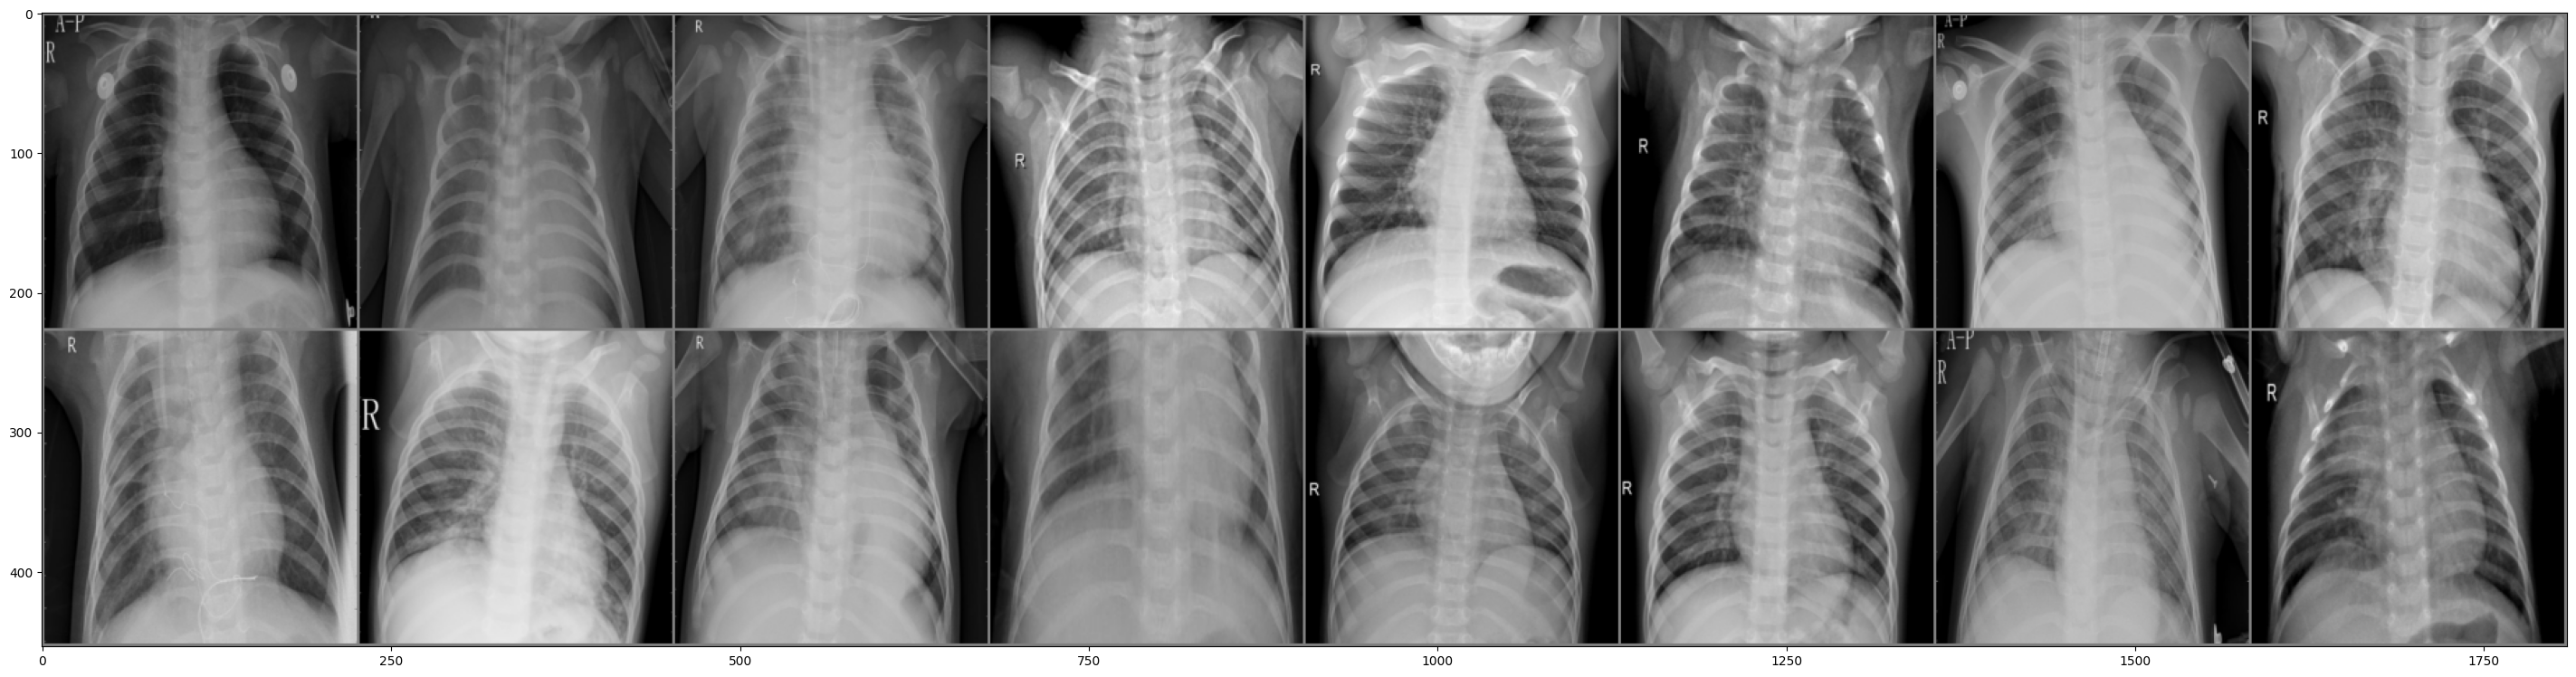

In [5]:
# grab the first batch of n images
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
# Print the labels
print('Label:', train_labels.numpy())

# plot the images
show_batch(train_features,(0.5,0.5))
